## Analysing Crypto Currency Market Data

### Introduction

CoinGecko is a crypto data provider and crypto market tracking website. CoinGecko also provides an API, which allows us to retrieve cryptocurrency data such as price, volume, market cap, and exchange data using code.

In this EDA project, we will extract crytpocurrency data from CoinGecko using pycoingecko API and perform exploratory data analysis on same.

### Outline

1) Coins List  
2) Coins Market Data  
3) Coins Historical Price Trend  
4) Coins Exchanges

<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [3]:
# For Data Exploration and Visualization

import numpy as np

import pandas as pd
pd.set_option('max_rows', 50)   
pd.set_option('max_columns', 100)
pd.set_option('precision', 2)   # round to two decimal points
pd.set_option('float_format', '{:,.2f}'.format)   # suppress scientific notation globally

import datetime

from pycoingecko import CoinGeckoAPI

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
cg = CoinGeckoAPI()

### Coins List

In [5]:
coins_list = cg.get_coins_list()
coins_list = pd.DataFrame(coins_list)
coins_list.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token


In [6]:
coins_list.shape

(8961, 3)

There are over 8000 coins available in the market !!

### Coins Market Data

In [7]:
coins_market = cg.get_coins_markets(vs_currency='usd', price_change_percentage = '7d,30d,1y')
coins_market = pd.DataFrame(coins_market)
coins_market.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,"45,066.00",847269239714,1,"946,933,745,920.00",36575169291,"46,970.00","44,510.00","-1,202.54",-2.60,"-22,018,161,041.18",-2.53,"18,789,756.00","21,000,000.00","21,000,000.00","64,805.00",-30.21,2021-04-14T11:54:46.763Z,67.81,"66,597.97",2013-07-06T00:00:00.000Z,None,2021-08-18T08:36:24.535Z,267.21,41.19,-1.26
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,"3,032.92",356120331035,2,nan,29422423553,"3,277.32","2,978.48",-165.88,-5.19,"-18,176,177,572.30",-4.86,"117,153,500.87",nan,nan,"4,356.99",-30.01,2021-05-12T14:41:48.623Z,0.43,"704,156.41",2015-10-20T00:00:00.000Z,"{'times': 88.9186279156765, 'currency': 'btc',...",2021-08-18T08:35:57.084Z,605.28,59.15,-3.65
2,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,2.00,64259171802,3,"90,177,368,604.00",3408529060,2.11,1.90,-0.08,-4.01,"-2,640,174,523.35",-3.95,"32,066,390,668.41","45,000,000,000.00","45,000,000,000.00",2.45,-17.60,2021-05-16T07:44:28.033Z,0.02,"10,366.20",2020-03-13T02:22:55.044Z,None,2021-08-18T08:36:12.165Z,"1,322.82",68.18,19.39
3,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.00,64206527325,4,nan,73077144529,1.00,0.99,-0.00,-0.30,"-183,368,885.25",-0.28,"64,308,735,031.21","64,308,735,031.21",nan,1.32,-24.54,2018-07-24T00:00:00.000Z,0.57,74.39,2015-03-02T00:00:00.000Z,None,2021-08-18T08:05:40.054Z,-0.16,-0.42,-0.04
4,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,397.53,61481424603,5,"67,847,046,470.00",2440257002,434.27,391.49,-26.26,-6.20,"-3,921,943,881.68",-6.00,"154,533,651.90","170,533,651.90","170,533,651.90",686.31,-41.74,2021-05-10T07:24:17.097Z,0.04,"1,004,022.32",2017-10-19T00:00:00.000Z,None,2021-08-18T08:36:17.928Z,"1,589.70",30.65,6.65


In [8]:
coins_market.shape

(100, 29)

By default, market data of top 100 coins by market cap is provided. We will work with same

In [9]:
coins_market.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated', 'price_change_percentage_1y_in_currency',
       'price_change_percentage_30d_in_currency',
       'price_change_percentage_7d_in_currency'],
      dtype='object')

In [10]:
# Drop columns not required
coins_market.drop(['symbol', 'image', 'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h', 'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage', 'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'], axis=1, inplace=True)

In [11]:
coins_market.head()

,id,name,current_price,market_cap,market_cap_rank,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,Bitcoin,"45,066.00",847269239714,1,267.21,41.19,-1.26
1,ethereum,Ethereum,"3,032.92",356120331035,2,605.28,59.15,-3.65
2,cardano,Cardano,2.00,64259171802,3,"1,322.82",68.18,19.39
3,tether,Tether,1.00,64206527325,4,-0.16,-0.42,-0.04
4,binancecoin,Binance Coin,397.53,61481424603,5,"1,589.70",30.65,6.65


#### Top 5 Coins Market Cap

In [12]:
coins_market['market_cap_per'] = (coins_market['market_cap'] / coins_market['market_cap'].sum()) * 100
coins_market.sort_values('market_cap_per',ascending=False).head()

,id,name,current_price,market_cap,market_cap_rank,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,market_cap_per
0,bitcoin,Bitcoin,"45,066.00",847269239714,1,267.21,41.19,-1.26,45.14
1,ethereum,Ethereum,"3,032.92",356120331035,2,605.28,59.15,-3.65,18.97
2,cardano,Cardano,2.00,64259171802,3,"1,322.82",68.18,19.39,3.42
3,tether,Tether,1.00,64206527325,4,-0.16,-0.42,-0.04,3.42
4,binancecoin,Binance Coin,397.53,61481424603,5,"1,589.70",30.65,6.65,3.28


Top 5 coins - Bitcoin, Ethereum, Cardano, Tether, Binance account for almost 75% of entire crypto market cap.  
Just Bitcoin and Ethereum, which were the first 2 coins introduced, account for ~65% of entire crypto market cap.

#### Plotting the Market Cap for Top 20 Coins

In [13]:
coins_market = coins_market[:20]

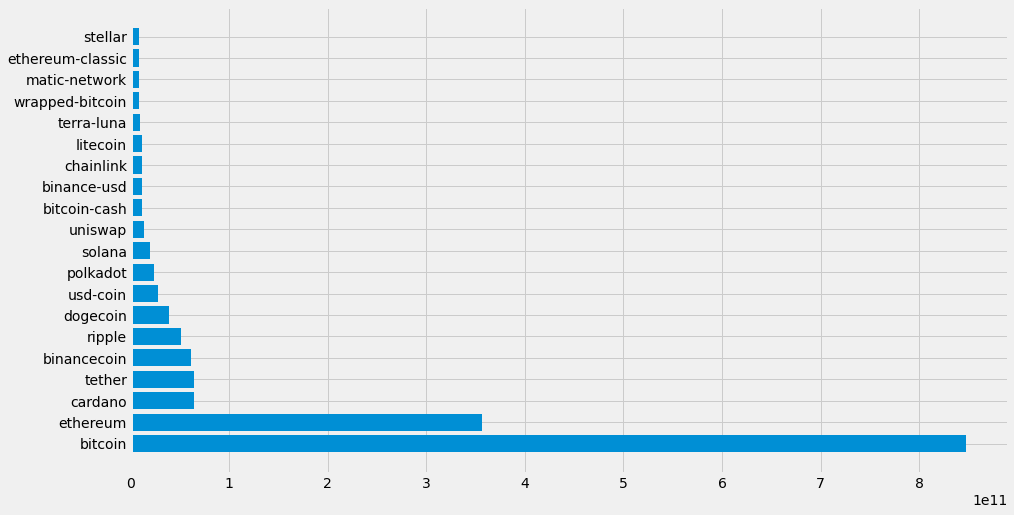

In [37]:
plt.figure(figsize=(14,8))
plt.barh(coins_market['id'],coins_market['market_cap']);

#### Top 10 coins with highest positive change in last 1 year

In [ ]:
coins

In [47]:
coins_sorted = coins_market.sort_values('price_change_percentage_1y_in_currency', ascending=False).head(10)
coins_sorted.head()

,id,name,current_price,market_cap,market_cap_rank,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,market_cap_per,norm_price,abs_price_change_1y
6,dogecoin,Dogecoin,0.30,38724344984,7,"8,093.50",60.26,14.72,2.06,0.00,"8,093.50"
17,matic-network,Polygon,1.35,8726931935,18,"4,567.90",68.20,16.67,0.46,0.00,"4,567.90"
15,terra-luna,Terra,23.94,9790905952,16,"4,137.57",262.10,43.51,0.52,0.00,"4,137.57"
9,solana,Solana,68.25,19589070210,10,"2,099.51",153.78,67.85,1.04,0.00,"2,099.51"
4,binancecoin,Binance Coin,397.53,61481424603,5,"1,589.70",30.65,6.65,3.28,0.01,"1,589.70"


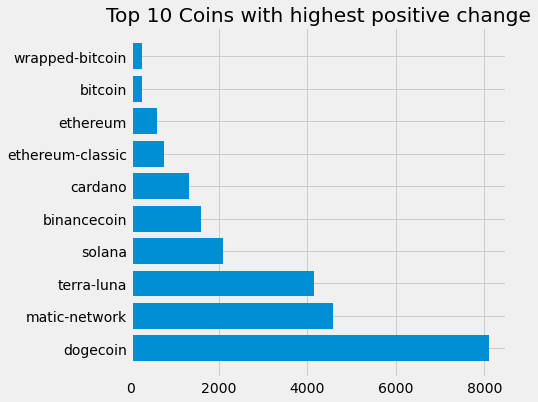

In [48]:
plt.figure(figsize=(6,6))
plt.barh(coins_sorted['id'],coins_sorted['price_change_percentage_1y_in_currency'])
plt.title('Top 10 Coins with highest positive change');

We have seen the news about meterioc rise in price of Dogecoin. This is explained [here](https://www.cnbctv18.com/business/explained-how-elon-musk-contributed-to-the-rise-of-meme-cryptocurrency-dogecoin-9107151.htm)

#### Top 5 Coins with least change in price over last 1 year

In [50]:
coins_negative = coins_market[coins_market['price_change_percentage_1y_in_currency'] < 1].copy()

In [52]:
coins_negative.head()

,id,name,current_price,market_cap,market_cap_rank,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,market_cap_per,norm_price,abs_price_change_1y
3,tether,Tether,1.00,64206527325,4,-0.16,-0.42,-0.04,3.42,0.00,0.16
7,usd-coin,USD Coin,1.00,27506054735,8,0.16,-0.50,-0.04,1.47,0.00,0.16
12,binance-usd,Binance USD,1.00,11884778900,13,-0.31,-0.55,-0.47,0.63,0.00,0.31


In [51]:
coins_sorted = coins_negative.sort_values('price_change_percentage_1y_in_currency', ascending=True).head(10)
coins_sorted.head()

,id,name,current_price,market_cap,market_cap_rank,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,market_cap_per,norm_price,abs_price_change_1y
12,binance-usd,Binance USD,1.00,11884778900,13,-0.31,-0.55,-0.47,0.63,0.00,0.31
3,tether,Tether,1.00,64206527325,4,-0.16,-0.42,-0.04,3.42,0.00,0.16
7,usd-coin,USD Coin,1.00,27506054735,8,0.16,-0.50,-0.04,1.47,0.00,0.16


In [45]:
coins_negative = coins_market.sort_values('price_change_percentage_1y_in_currency').head(10)
coins_negative.head()

,id,name,current_price,market_cap,market_cap_rank,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,market_cap_per,norm_price,abs_price_change_1y
12,binance-usd,Binance USD,1.00,11884778900,13,-0.31,-0.55,-0.47,0.63,0.00,0.31
3,tether,Tether,1.00,64206527325,4,-0.16,-0.42,-0.04,3.42,0.00,0.16
7,usd-coin,USD Coin,1.00,27506054735,8,0.16,-0.50,-0.04,1.47,0.00,0.16
13,chainlink,Chainlink,26.15,11673974911,14,57.41,67.56,6.50,0.62,0.00,57.41
11,bitcoin-cash,Bitcoin Cash,639.10,12045034722,12,101.09,45.15,7.80,0.64,0.01,101.09


Binance and Tether, which are also in Top 20 coins by market cap, actually fell a bit from previous year

### Coins Historical Price Trend

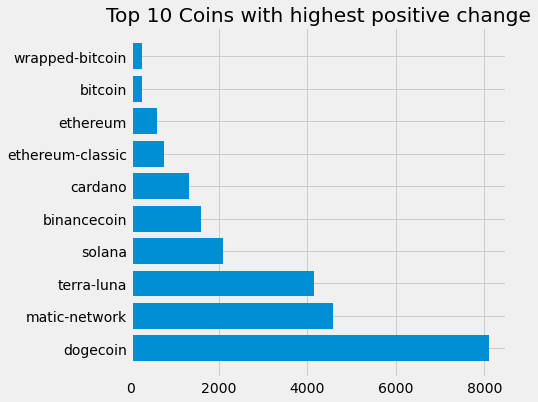

In [42]:
plt.figure(figsize=(6,6))
plt.barh(coins_positive['id'],coins_sorted['price_change_percentage_1y_in_currency'])
plt.title('Top 10 Coins with highest positive change');

In [59]:
coin_history = {}

for id in coins_market.loc[:10,'id']:
    coin_data = cg.get_coin_market_chart_by_id(id=id, vs_currency='usd', days=91)
    coin_history[id] = coin_data['prices']

coin_history = pd.DataFrame(coin_history)

for coin in coin_history.columns:
    date_col = coin + '_date'
    price_col = coin + '_price'
    coin_history[date_col] = coin_history[coin].str[0]
    coin_history[price_col] = coin_history[coin].str[1]

coin_history.head()

,bitcoin,ethereum,tether,binancecoin,cardano,dogecoin,ripple,usd-coin,polkadot,binance-usd,...,ripple_date,ripple_price,usd-coin_date,usd-coin_price,polkadot_date,polkadot_price,binance-usd_date,binance-usd_price,uniswap_date,uniswap_price
0,"[1617580800000, 58228.802623466196]","[1617667200000, 2097.7963827792596]","[1617580800000, 1.000522937980545]","[1617667200000, 367.45802723081573]","[1617580800000, 1.1834195167997104]","[1617580800000, 0.05789756018165116]","[1617580800000, 0.6333526453068182]","[1617667200000, 0.9995305686004268]","[1617580800000, 44.23991890458163]","[1617580800000, 1.000600866223212]",...,1617580800000,0.633353,1617667200000,0.999531,1617580800000,44.239919,1617580800000,1.000601,1617667200000,30.738906
1,"[1617667200000, 58706.81559311396]","[1617753600000, 2115.0554517461082]","[1617667200000, 0.9993282015573209]","[1617753600000, 404.4605067817102]","[1617667200000, 1.2138169649551138]","[1617667200000, 0.05981544389374014]","[1617667200000, 0.9074547526990332]","[1617753600000, 0.9998567004824946]","[1617667200000, 45.608300004049674]","[1617667200000, 1.0000167858690603]",...,1617667200000,0.907455,1617753600000,0.999857,1617667200000,45.608300,1617667200000,1.000017,1617753600000,31.353609
2,"[1617753600000, 58062.17872433649]","[1617840000000, 1989.1480619041722]","[1617753600000, 1.0003031058101515]","[1617840000000, 377.00503501889756]","[1617753600000, 1.255331700688716]","[1617753600000, 0.06463255671171673]","[1617753600000, 1.097633770923746]","[1617840000000, 0.9985358718598235]","[1617753600000, 43.42494300781044]","[1617753600000, 1.0000583288221851]",...,1617753600000,1.097634,1617840000000,0.998536,1617753600000,43.424943,1617753600000,1.000058,1617840000000,28.616200
3,"[1617840000000, 56134.41738866435]","[1617926400000, 2081.3540625398964]","[1617840000000, 0.9994598870477507]","[1617926400000, 418.1377217019414]","[1617840000000, 1.1771597102783828]","[1617840000000, 0.058961028299255425]","[1617840000000, 0.9221401420253109]","[1617926400000, 1.001344379784624]","[1617840000000, 39.7504883353942]","[1617840000000, 0.999508845076531]",...,1617840000000,0.922140,1617926400000,1.001344,1617840000000,39.750488,1617840000000,0.999509,1617926400000,30.201265
4,"[1617926400000, 58065.644024815316]","[1618012800000, 2069.6677960855295]","[1617926400000, 1.0017759574376317]","[1618012800000, 451.21085727443034]","[1617926400000, 1.2299092109601504]","[1617926400000, 0.06167975458140067]","[1617926400000, 1.050768096482137]","[1618012800000, 1.0012366370700763]","[1617926400000, 41.40897804173473]","[1617926400000, 1.0022114492424887]",...,1617926400000,1.050768,1618012800000,1.001237,1617926400000,41.408978,1617926400000,1.002211,1618012800000,29.526548


In [63]:
coin_history.drop(coin_history.columns[:11], axis=1, inplace=True)
coin_history.head()

,bitcoin_date,bitcoin_price,ethereum_date,ethereum_price,tether_date,tether_price,binancecoin_date,binancecoin_price,cardano_date,cardano_price,...,ripple_date,ripple_price,usd-coin_date,usd-coin_price,polkadot_date,polkadot_price,binance-usd_date,binance-usd_price,uniswap_date,uniswap_price
0,1617580800000,58228.802623,1617667200000,2097.796383,1617580800000,1.000523,1617667200000,367.458027,1617580800000,1.183420,...,1617580800000,0.633353,1617667200000,0.999531,1617580800000,44.239919,1617580800000,1.000601,1617667200000,30.738906
1,1617667200000,58706.815593,1617753600000,2115.055452,1617667200000,0.999328,1617753600000,404.460507,1617667200000,1.213817,...,1617667200000,0.907455,1617753600000,0.999857,1617667200000,45.608300,1617667200000,1.000017,1617753600000,31.353609
2,1617753600000,58062.178724,1617840000000,1989.148062,1617753600000,1.000303,1617840000000,377.005035,1617753600000,1.255332,...,1617753600000,1.097634,1617840000000,0.998536,1617753600000,43.424943,1617753600000,1.000058,1617840000000,28.616200
3,1617840000000,56134.417389,1617926400000,2081.354063,1617840000000,0.999460,1617926400000,418.137722,1617840000000,1.177160,...,1617840000000,0.922140,1617926400000,1.001344,1617840000000,39.750488,1617840000000,0.999509,1617926400000,30.201265
4,1617926400000,58065.644025,1618012800000,2069.667796,1617926400000,1.001776,1618012800000,451.210857,1617926400000,1.229909,...,1617926400000,1.050768,1618012800000,1.001237,1617926400000,41.408978,1617926400000,1.002211,1618012800000,29.526548


As there is huge variation in price of coins, we will do a min-max scaling, so that the price trend can be plotted and compared

In [65]:
price_cols = [col for col in coin_history.columns if 'price' in col]
for coin in price_cols:
    scaled_col = coin + '_scaled'
    coin_min = coin_history[coin].min()
    coin_max = coin_history[coin].max()
    coin_history[scaled_col] = coin_history[coin].apply(lambda x: (x - coin_min) / (coin_max - coin_min))
    coin_history.drop(coin, axis=1, inplace=True)
    
coin_history.head()

,bitcoin_date,ethereum_date,tether_date,binancecoin_date,cardano_date,dogecoin_date,ripple_date,usd-coin_date,polkadot_date,binance-usd_date,...,ethereum_price_scaled,tether_price_scaled,binancecoin_price_scaled,cardano_price_scaled,dogecoin_price_scaled,ripple_price_scaled,usd-coin_price_scaled,polkadot_price_scaled,binance-usd_price_scaled,uniswap_price_scaled
0,1617580800000,1617667200000,1617580800000,1617667200000,1617580800000,1617580800000,1617580800000,1617667200000,1617580800000,1617580800000,...,0.118673,0.530839,0.256613,0.082214,0.000000,0.063444,0.386354,0.906042,0.653115,0.548731
1,1617667200000,1617753600000,1617667200000,1617753600000,1617667200000,1617667200000,1617667200000,1617753600000,1617667200000,1617667200000,...,0.125968,0.446730,0.346026,0.107512,0.003074,0.276603,0.403820,0.947618,0.623630,0.571571
2,1617753600000,1617840000000,1617753600000,1617840000000,1617753600000,1617753600000,1617753600000,1617840000000,1617753600000,1617753600000,...,0.072747,0.515363,0.279682,0.142062,0.010794,0.424497,0.333083,0.881281,0.625727,0.469859
3,1617840000000,1617926400000,1617840000000,1617926400000,1617840000000,1617840000000,1617840000000,1617926400000,1617840000000,1617840000000,...,0.111722,0.456001,0.379076,0.077004,0.001704,0.288023,0.483494,0.769640,0.597989,0.528754
4,1617926400000,1618012800000,1617926400000,1618012800000,1617926400000,1617926400000,1617926400000,1618012800000,1617926400000,1617926400000,...,0.106783,0.619051,0.458994,0.120905,0.006062,0.388052,0.477723,0.820030,0.734420,0.503684


In [73]:
coin_df = {}
coins = coins_market.loc[:10,'id']
for coin in coins:
    coin_date = coin + '_date'
    coin_price = coin + '_price_scaled'
    coin_df[coin] = pd.DataFrame({'coin_id':coin, 'Date':coin_history[coin_date], 'Price':coin_history[coin_price]})

In [74]:
coin_df.keys()

dict_keys(['bitcoin', 'ethereum', 'tether', 'binancecoin', 'cardano', 'dogecoin', 'ripple', 'usd-coin', 'polkadot', 'binance-usd', 'uniswap'])

In [75]:
coin_df['bitcoin'].head()

,coin_id,Date,Price
0,bitcoin,1617580800000,0.832170
1,bitcoin,1617667200000,0.847171
2,bitcoin,1617753600000,0.826940
3,bitcoin,1617840000000,0.766442
4,bitcoin,1617926400000,0.827049


In [79]:
coins_history_df = pd.DataFrame()
for coin,df in coin_df.items():
    coins_history_df = pd.concat([coins_history_df, df], axis=0)

coins_history_df

,coin_id,Date,Price
0,bitcoin,1617580800000,0.832170
1,bitcoin,1617667200000,0.847171
2,bitcoin,1617753600000,0.826940
3,bitcoin,1617840000000,0.766442
4,bitcoin,1617926400000,0.827049
...,...,...,...
87,uniswap,1625184000000,0.074167
88,uniswap,1625270400000,0.084032
89,uniswap,1625356800000,0.128034
90,uniswap,1625443200000,0.182118


In [81]:
coins_history_df['Price_Date'] = pd.to_datetime(coins_history_df['Date'], unit='ms')
coins_history_df.head()

,coin_id,Date,Price,Price_Date
0,bitcoin,1617580800000,0.832170,2021-04-05
1,bitcoin,1617667200000,0.847171,2021-04-06
2,bitcoin,1617753600000,0.826940,2021-04-07
3,bitcoin,1617840000000,0.766442,2021-04-08
4,bitcoin,1617926400000,0.827049,2021-04-09


In [82]:
coins_history_df.drop(['Date'], inplace=True, axis=1)

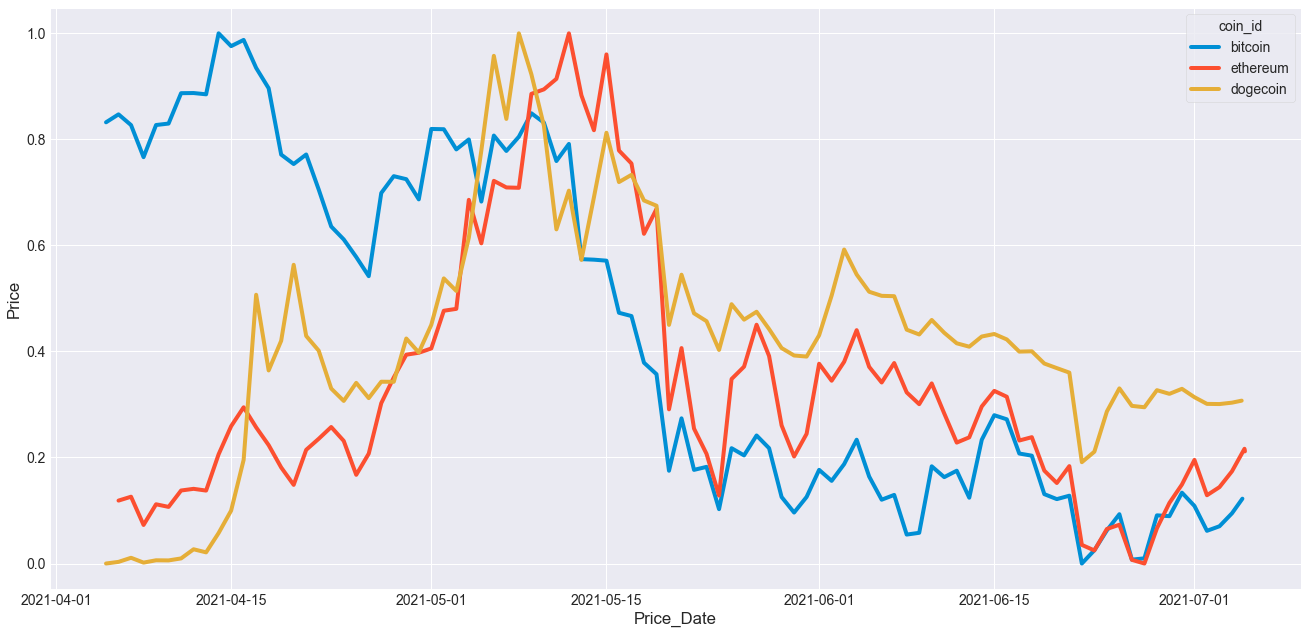

In [87]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

data = coins_history_df[coins_history_df['coin_id'].isin(['bitcoin','ethereum', 'dogecoin'])]

sns.lineplot(x='Price_Date', y='Price', hue='coin_id', data=data);

### Coin Exchanges

In [57]:
coin_exchanges = cg.get_exchanges_list()
coin_exchanges = pd.DataFrame(coin_exchanges)
coin_exchanges.head()

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,"2,017.00",Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10,1,"683,486.71","683,486.71"
1,huobi,Huobi Global,"2,013.00",Seychelles,,https://www.huobi.com,https://assets.coingecko.com/markets/images/25...,False,10,2,"158,826.14","158,826.14"
2,gdax,Coinbase Exchange,"2,012.00",United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,False,10,3,"102,642.21","102,642.21"
3,ftx_spot,FTX,"2,019.00",Antigua and Barbuda,,https://ftx.com/,https://assets.coingecko.com/markets/images/45...,False,10,4,"54,524.31","54,524.31"
4,crypto_com,Crypto.com Exchange,"2,019.00",Cayman Islands,Crypto.com Exchange is the best place to trade...,https://crypto.com/exchange,https://assets.coingecko.com/markets/images/58...,False,10,5,"37,277.56","37,277.56"


In [62]:
coin_exchanges['year_established'].value_counts().sort_index(ascending=False)

2,020.00     6
2,019.00    17
2,018.00    23
2,017.00    14
2,016.00     5
2,015.00     1
2,014.00    11
2,013.00    10
2,012.00     2
2,011.00     2
Name: year_established, dtype: int64

Years 2017-2019 saw most exchanges established

#### Top 10 Countries with Most Crypto Exchanges

In [58]:
coin_exchanges['country'].value_counts().sort_values(ascending=False).head(10)

Seychelles                12
Estonia                    8
United States              7
Singapore                  7
South Korea                6
United Kingdom             6
Cayman Islands             5
Japan                      5
China                      4
British Virgin Islands     3
Name: country, dtype: int64

In [64]:
top_exchanges = coin_exchanges[['name','trade_volume_24h_btc']][:10]

#### Top 10 Exchanges Trading Volumes

In [66]:
top_exchanges.head()

,name,trade_volume_24h_btc
0,Binance,"683,486.71"
1,Huobi Global,"158,826.14"
2,Coinbase Exchange,"102,642.21"
3,FTX,"54,524.31"
4,Crypto.com Exchange,"37,277.56"


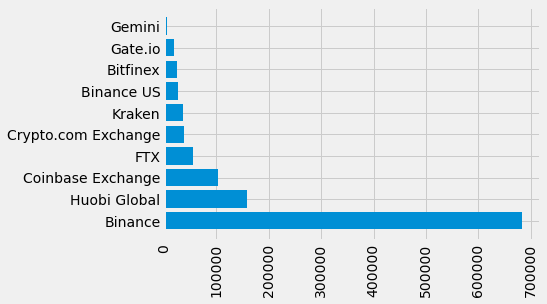

In [72]:
plt.barh(top_exchanges['name'],top_exchanges['trade_volume_24h_btc'])
plt.xticks(rotation=90);

Binance Exchange in Cayman Islands is way ahead in terms of Trading Volumes